In [1]:
%reload_ext autoreload

%autoreload 2

In [2]:
input_file = "../../test_data/system_tests/MaxQuant_boxcar/evidence.txt.maxquant_evidence_benchmark.aq_reformat.tsv"
input_file = "../../test_data/system_tests/MaxQuant_boxcar/evidence.txt"
maxquant_file = "../../test_data/system_tests/MaxQuant_boxcar/proteinGroups.txt"
directlfq_file = "../../test_data/system_tests/MaxQuant_boxcar/evidence.txt.protgroup_annotated.tsv.maxquant_evidence.protein_intensities.tsv"

samplemap_directlfq = "../../test_data/system_tests/MaxQuant_boxcar/samplemap.directLFQ.tsv"

samplemap_maxquant = "../../test_data/system_tests/MaxQuant_boxcar/samplemap.maxLFQ.tsv"

benchmark_figure = "../../test_data/system_tests/MaxQuant_boxcar/benchmark_mqset.pdf"



run_directlfq = False

In [3]:
if run_directlfq:
    import directlfq.lfq_manager as lfqmgr

    lfqmgr.run_lfq(input_file=input_file, input_type_to_use="maxquant_evidence", mq_protein_groups_txt=maxquant_file)


In [4]:
import directlfq.benchmarking as lfqbenchmark
import directlfq.utils as lfqutils

samplemap_df_directlfq = lfqutils.load_samplemap(samplemap_directlfq)
samples_used_directlfq = lfqutils.get_samples_used_from_samplemap_df(samplemap_df_directlfq, cond1="dda12", cond2="dda2")
samplemap_df_maxlfq = lfqutils.load_samplemap(samplemap_maxquant)
samples_used_maxlfq = lfqutils.get_samples_used_from_samplemap_df(samplemap_df_maxlfq, cond1="dda12", cond2 = "dda2")

restable_directlfq = lfqbenchmark.ResultsTableDirectLFQ(input_file=directlfq_file, input_name="directLFQ", samples_c1=samples_used_directlfq[0], samples_c2=samples_used_directlfq[1])
restable_maxlfq = lfqbenchmark.ResultsTableMaxQuant(input_file=maxquant_file, input_name="maxLFQ", samples_c1=samples_used_maxlfq[0], samples_c2=samples_used_maxlfq[1])

/Users/constantin/workspace/directlfq/directlfq/benchmarking.py:153: RuntimeWarning: divide by zero encountered in log2
  self.formated_dataframe[self.log2fc_column] = [np.log2(x[0]) - np.log2(x[1]) for x in zip(self.formated_dataframe['median_intensity_c1'], self.formated_dataframe['median_intensity_c2'])]
/Users/constantin/workspace/directlfq/directlfq/benchmarking.py:153: RuntimeWarning: invalid value encountered in double_scalars
  self.formated_dataframe[self.log2fc_column] = [np.log2(x[0]) - np.log2(x[1]) for x in zip(self.formated_dataframe['median_intensity_c1'], self.formated_dataframe['median_intensity_c2'])]
/Users/constantin/workspace/directlfq/directlfq/benchmarking.py:153: RuntimeWarning: divide by zero encountered in log2
  self.formated_dataframe[self.log2fc_column] = [np.log2(x[0]) - np.log2(x[1]) for x in zip(self.formated_dataframe['median_intensity_c1'], self.formated_dataframe['median_intensity_c2'])]
/Users/constantin/workspace/directlfq/directlfq/benchmarking.py:

In [5]:
display(restable_directlfq.formated_dataframe)
display(restable_maxlfq.formated_dataframe)

,protein,BoxCar_02-01_1,BoxCar_02-01_2,BoxCar_02-01_3,BoxCar_12-01_1,BoxCar_12-01_2,BoxCar_12-01_3,Shotgun_02-01_1,Shotgun_02-01_2,Shotgun_02-01_3,Shotgun_12-01_1,Shotgun_12-01_2,Shotgun_12-01_3,Gene names,Protein IDs,median_intensity_c1,median_intensity_c2,log2fc,mean_intensity
0,A0A024R4E5;Q00341;Q00341-2;H0Y394;H7C0A4;C9J5E...,3.806263e+09,3.736188e+09,3.565436e+09,3.947341e+09,3.893691e+09,3.874254e+09,4.306794e+09,3.896395e+09,3.813581e+09,4.159896e+09,3.912615e+09,3.759152e+09,HDLBP,A0A024R4E5;Q00341;Q00341-2;H0Y394;H7C0A4;C9J5E...,3.912615e+09,3.896395e+09,0.005993,3.904505e+09
1,A0A075B730;A0A087X1U6,1.989089e+09,2.234458e+09,2.088211e+09,2.419421e+09,2.354664e+09,2.409247e+09,2.207754e+09,2.057357e+09,2.388229e+09,2.243384e+09,2.314065e+09,2.443583e+09,EPPK1,A0A075B730;A0A087X1U6,2.314065e+09,2.207754e+09,0.067850,2.260909e+09
2,A0A087WUD1;Q6DD87,6.785581e+07,4.826846e+07,5.490865e+07,5.414207e+07,8.135461e+06,1.154287e+07,5.042876e+07,6.895519e+07,6.617953e+07,6.055412e+07,5.018431e+07,6.056924e+07,ZNF787,A0A087WUD1;Q6DD87,6.055412e+07,6.617953e+07,-0.128160,6.336683e+07
3,A0A087WUM0;P57105;A0A087X1F5;A0A087WYV9;Q9P0S2...,4.331548e+07,5.764873e+07,7.044594e+07,7.991673e+07,8.246245e+07,5.904183e+07,2.621835e+07,4.759519e+07,8.637330e+07,6.799341e+07,6.825836e+07,9.089007e+07,SYNJ2BP-COX16;SYNJ2BP,A0A087WUM0;P57105;A0A087X1F5;A0A087WYV9;Q9P0S2...,6.825836e+07,4.759519e+07,0.520190,5.792678e+07
4,A0A087X1S3,3.218257e+08,2.363041e+08,2.646910e+08,3.306071e+08,2.680220e+08,2.672274e+08,3.191158e+08,2.372985e+08,2.426108e+08,2.710062e+08,2.300356e+08,2.648921e+08,HUWE1,A0A087X1S3,2.648921e+08,2.426108e+08,0.126761,2.537515e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6808,S4R3N1;Q9Y3A3;Q9Y3A3-2;Q9Y3A3-3;B4DM50,4.730234e+07,7.185626e+07,9.673078e+07,5.228528e+07,6.938569e+07,8.139047e+07,8.762288e+07,7.913392e+07,1.045987e+08,4.019606e+07,8.849187e+07,8.864937e+07,HSPE1;HSPE1-MOB4,S4R3N1;Q9Y3A3;Q9Y3A3-2;Q9Y3A3-3;B4DM50,8.849187e+07,8.762288e+07,0.014237,8.805738e+07
6809,S4R435,1.077120e+08,1.190313e+08,1.198340e+08,1.012511e+08,1.078085e+08,1.087923e+08,1.030187e+08,1.018133e+08,1.069404e+08,9.708095e+07,1.013010e+08,1.301443e+08,RPS10;RPS10-NUDT3,S4R435,1.013010e+08,1.030187e+08,-0.024257,1.021598e+08
6810,U3KQK5;P10176,4.874305e+07,3.231079e+07,3.416748e+07,3.683169e+07,4.728287e+07,4.900505e+07,2.721814e+07,4.369841e+07,3.224896e+07,3.854265e+07,3.984516e+07,3.486863e+07,COX8A,U3KQK5;P10176,3.854265e+07,3.224896e+07,0.257203,3.539581e+07
6811,V9HW75;A0A087WSV8;P80303;E9PKG6;P80303-2;Q2L69...,1.631156e+08,1.626433e+08,1.596837e+08,1.752335e+08,1.906676e+08,1.733268e+08,1.736735e+08,1.869612e+08,1.732200e+08,1.943947e+08,1.983450e+08,1.992638e+08,HEL-S-109;NUCB2;Nucb2,V9HW75;A0A087WSV8;P80303;E9PKG6;P80303-2;Q2L69...,1.983450e+08,1.736735e+08,0.191634,1.860093e+08


,protein,LFQ intensity Shotgun_02-01_1,LFQ intensity Shotgun_02-01_2,LFQ intensity Shotgun_02-01_3,LFQ intensity Shotgun_12-01_1,LFQ intensity Shotgun_12-01_2,LFQ intensity Shotgun_12-01_3,median_intensity_c1,median_intensity_c2,log2fc,mean_intensity
0,P35237;A0A024QZX5;A0A087X1N8;C9JTJ8;C9JVA8,3643600000,2971500000,3188400000,3655800000,3605500000,4274800000,3.655800e+09,3.188400e+09,0.197355,3.422100e+09
1,A0A024R4E5;Q00341;Q00341-2;H0Y394;H7C0A4;C9J5E...,5321900000,4503700000,4356100000,5657400000,5466200000,5410700000,5.466200e+09,4.503700e+09,0.279428,4.984950e+09
2,P60002;K7EN05;K7EPC8;A0A024R7E8;K7EQ44;K7EMV4,86756000,69719000,108880000,152760000,99195000,134370000,1.343700e+08,8.675600e+07,0.631176,1.105630e+08
3,Q14241;A0A024RAC6,317040000,421780000,412000000,444980000,503490000,385790000,4.449800e+08,4.120000e+08,0.111096,4.284900e+08
4,G8JLL2;A0A0G2JK02;A0A0G2JIU6;A0A0G2JHB6;A0A0G2...,36886000,24031000,28317000,41376000,36666000,42425000,4.137600e+07,2.831700e+07,0.547126,3.484650e+07
...,...,...,...,...,...,...,...,...,...,...,...
6877,REV__Q9UNX4,425360000,712670000,744970000,0,0,0,0.000000e+00,7.126700e+08,-inf,3.563350e+08
6878,S4R3H4;Q9UKV3;E7EQT4;Q9UKV3-5;Q9UKV3-2;G3V3B0;...,1869000000,1562200000,1564300000,2030200000,2050000000,2396400000,2.050000e+09,1.564300e+09,0.390107,1.807150e+09
6879,S4R3N1;Q9Y3A3;Q9Y3A3-2;Q9Y3A3-3;B4DM50,96161000,86862000,123400000,51813000,122920000,119260000,1.192600e+08,9.616100e+07,0.310586,1.077105e+08
6880,S4R435,5546300000,5833600000,5821000000,6785000000,7053600000,7264400000,7.053600e+09,5.821000e+09,0.277093,6.437300e+09


In [6]:
organism_annotator = lfqbenchmark.OrganismAnnotatorMaxQuant(mapping_file=maxquant_file, protein_column='Protein IDs')

organism_annotator.annotate_table_with_organism(restable_maxlfq)
organism_annotator.annotate_table_with_organism(restable_directlfq)

In [7]:
import seaborn as sns
import directlfq.visualizations as lfq_viz

class MultiOrganismMultiMethodBoxPlotAdapted(lfq_viz.MultiOrganismMultiMethodBoxPlot):
    def __init__(self, method_ratio_results_table, ax, organisms_to_plot, fcs_to_expect):
        super().__init__( method_ratio_results_table, ax, organisms_to_plot, fcs_to_expect)
    
    def plot_boxplot(self):
        color_palette = sns.color_palette(self._colorlist_hex, n_colors=len(self._fcs_to_expect))
        sns.violinplot(data=self._method_ratio_results_table, x="method", y = "log2fc", hue= "organism", palette=color_palette, hue_order=self._organisms_to_plot, ax=self.ax, linewidth=0.8)

Escherichia coli num:893 median_FC:-2.4 STD:0.57

Homo sapiens num:5055 median_FC:0.03 STD:0.31

Escherichia coli num:889 median_FC:-2.3 STD:0.86

Homo sapiens num:5006 median_FC:0.28 STD:0.33



/Users/constantin/opt/anaconda3/envs/directlfq/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/constantin/opt/anaconda3/envs/directlfq/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


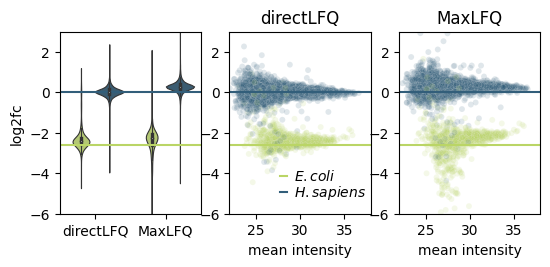

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import directlfq.visualizations as lfq_viz
import directlfq.benchmarking as lfq_benchmark
import numpy as np

methodname2resultsdf = {'directLFQ' : restable_directlfq.formated_dataframe, 'MaxLFQ' : restable_maxlfq.formated_dataframe}
organisms_to_plot =["Escherichia coli", "Homo sapiens"]
fcs_to_expect= [-np.log2(6), 0]

fig_length = 2.363
a4_width = 8.27
width_of_broader_dia_plot = 8.27
relative_width_of_broader_dia_plot = 4
relative_width_of_narrower_dda_plot = 3
width_of_narrower_dda_plot = 8.27*relative_width_of_narrower_dda_plot/relative_width_of_broader_dia_plot

fig, axes = plt.subplots(1, 3,figsize=(width_of_narrower_dda_plot,2.363 ))#, gridspec_kw={'width_ratios' : [1, 1, 1]})



merged_table = lfq_benchmark.ResultsTableMerger(method_name2results_df=methodname2resultsdf).merged_table


MultiOrganismMultiMethodBoxPlotAdapted(method_ratio_results_table=merged_table, ax = axes[0], organisms_to_plot=organisms_to_plot,fcs_to_expect= fcs_to_expect)

fcplotter_directLFQ = lfqbenchmark.MultiOrganismIntensityFCPlotter(ax=axes[1], resultstable_w_ratios=restable_directlfq, organisms_to_plot = organisms_to_plot, fcs_to_expect= fcs_to_expect, title="directLFQ")

fcplotter_maxLFQ = lfqbenchmark.MultiOrganismIntensityFCPlotter(ax=axes[2], resultstable_w_ratios= restable_maxlfq, organisms_to_plot = organisms_to_plot,  fcs_to_expect= fcs_to_expect, title= "MaxLFQ")


axes[0].set_ylim([-6, 3])
axes[1].set_ylim([-6, 3])
axes[1].set_xlim([22, 38])
axes[2].set_ylim([-6, 3])
axes[2].set_xlim([22, 38])


for ax in axes:
    ax.get_legend().remove()

for ax in axes[1:]:
    ax.set_ylabel("")

for ax in axes:
    ax.set_xlabel("mean intensity")
axes[0].set_xlabel("")


lines = axes[1].get_lines()
fig.legend(lines, ["$E. coli$", "$H. sapiens$"], bbox_to_anchor=[0.55, 0.23], 
           loc='center', ncol=1, title =None, frameon = False, labelspacing = 0, handlelength = 0.5, handletextpad = 0.5)


fig.savefig(benchmark_figure,  bbox_inches="tight", dpi=300)
fig.savefig(benchmark_figure.replace(".pdf", ".png"),  bbox_inches="tight", dpi=300)

In [9]:
class ResultsTableMerger():
    def __init__(self, method_name2results_df):
        self._method_name2results_df = method_name2results_df
        self._list_of_tables = []

        self.merged_table = None

        self._define_merged_table()

    def _define_merged_table(self):
        self._collect_list_of_annotated_tables()
        self.merged_table = pd.concat(self._list_of_tables)
        self._filter_merged_table_for_valid_fcs()
    
    def _collect_list_of_annotated_tables(self):
        for method, df in self._method_name2results_df.items():
            self._add_method_column(method, df)
            self._list_of_tables.append(df)

    def _filter_merged_table_for_valid_fcs(self):
        is_valid = [np.isfinite(x) for x in self.merged_table["log2fc"]]
        self.merged_table = self.merged_table[is_valid]

    @staticmethod
    def _add_method_column(method, df):
        df["method"] = method
    